<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=250 ALIGN="right">
</figure>

# Exploratory Computing with Python
*Developed by Mark Bakker*
## Statistics Notebook 4: Linear regression and curve fitting

In this notebook we will perform linear regression on some of the data in the data set on wooden beams, and we perform do curve fitting on a data set of groundwater head observations

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

###Linear regression
We apply linear regression to fit a straight line through a set of data. The function `polyfit` fits a polynomial of arbitrary degree through a set of data (`polyfit` is part of the `numpy` package). The input arguments are `x,y,degree`. When the degree of the polynomial is 1, it fits a straight line of the form $y=p[0]*x+p[1]$ and it returns the array of parameters `p`. The parameters are obtained by `polyfit` by minimizing the sum of the squares of the errors between the data (the $y$-values) and the fitted polynomial. For example, consider the `xdata` and `ydata` below. The slope and $y$-intercept of the best-fit line are computed and both the data and best-fit line are drawn.

fitted slope:  0.9714285714285712
fitted y-intercept:  1.2380952380952381


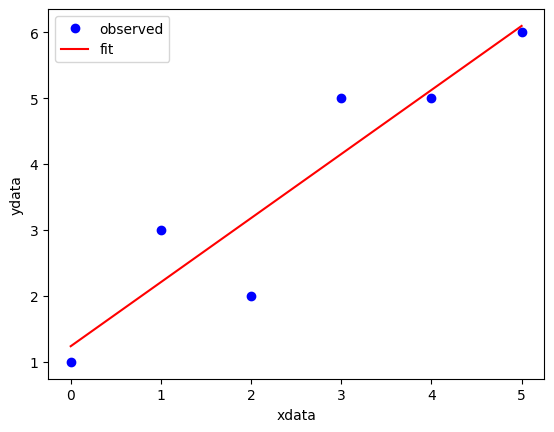

In [2]:
xdata = np.array([0.0,1.0,2.0,3.0,4.0,5.0])  # Observed value of x
ydata = np.array([1.0,3.0,2.0,5.0,5.0,6.0])  # Observed value of y
a,b = np.polyfit(xdata,ydata,1)
print('fitted slope: ',a)
print('fitted y-intercept: ',b)
plt.plot(xdata, ydata, 'bo', label='observed')
yfit = a*xdata + b
error = ydata - yfit  # Error
plt.plot(xdata, yfit, 'r', label='fit')
plt.xlabel('xdata')
plt.ylabel('ydata')
plt.legend(loc='best')

###Exercise 1. Straight line fit between `Edyn` and `Estat`
The data set of experiments on wooden beams contains two measurements of the elasticity modulus. The column labeled `Estat` contains measurements of the elasticity modulus using a standard static bending experiment. The column labeled `Edyn` contains measurements of the elasticity modulus using a dynamic mechanical analysis where an oscillatory force is applied. The two experiments don't give exactly the same value. You are asked to determine the linear relationship between the two measurements. Let's first assume that the measurement of `Estat` is much more accurate than the measurement of `Edyn` (we will consider the reverse some other time).

Plot the `Edyn` data on the $y$-axis vs. the `Estat` data on the $x$-axis using blue markers. Use `polyfit` to determine the parameters of the best-fit straight line. Add the best-fit straight line as a red line to the graph. Label the axes and add a legend.

In [3]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)

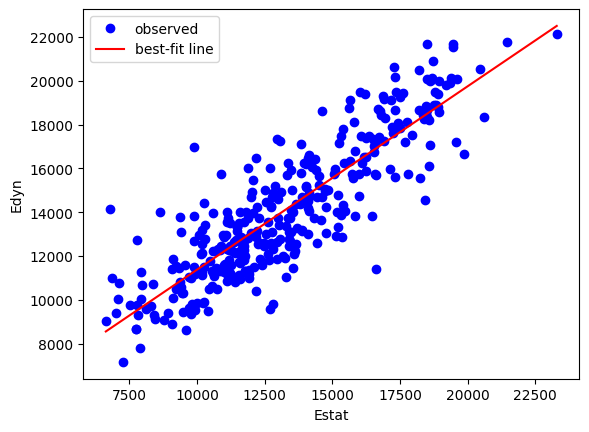

In [4]:
a,b = np.polyfit(w.Estat,w.Edyn,1)
xfit = np.linspace(w.Estat.min(),w.Estat.max(),100)
yfit = a * xfit + b
plt.plot(w.Estat,w.Edyn,'bo',label='observed')
plt.plot(xfit,yfit,'r',label='best-fit line')
plt.xlabel('Estat')
plt.ylabel('Edyn')
plt.legend(loc='best')

###Exercise 2. Error analysis of linear regression of `Edyn` and `Estat`
Compute the difference between the fitted and observed values of `Edyn`; these are called the errors. Compute the mean and standard deviation of the error (if you have done the fit correctly, the mean should be very close to zero). Create a histogram of the errors. Add to the same graph the Normal distribution using the sample mean and sample standard deviation you just computed. On the same graph, add vertical lines for the 2.5 and 97.5 percentiles according to the Normal distribution.

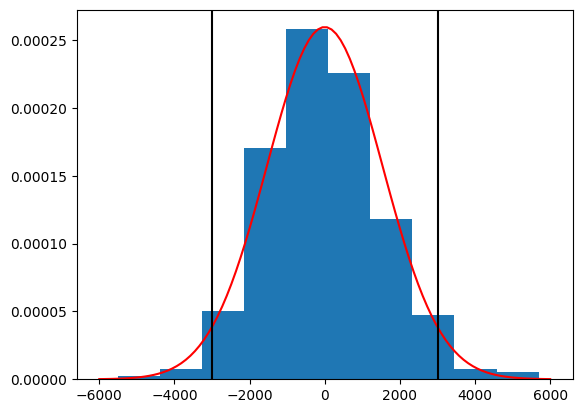

In [5]:
from scipy.stats import norm
error = w.Edyn - (a*w.Estat + b)
mu = np.mean(error)
sig = np.std(error)
plt.hist(error,density=True)
x = np.linspace(-6000,6000,100)
y = norm.pdf(x,loc=mu,scale=sig)
plt.plot(x,y,'r')
x025 = norm.ppf(0.025,loc=mu,scale=sig)
x975 = norm.ppf(0.975,loc=mu,scale=sig)
plt.axvline(x025,color='k')
plt.axvline(x975,color='k')

Count how many data points fall outside the 95% interval according to the corresponding Normal distribution. The data points outside the 95% interval are potential outliers. Recreate the plot you made in Exercise 3, but now plot the data points inside the 95% interval with black circles and the data points outside the 95% interval with red circles (refer to Notebook 4 of quarter 1 if you forgot how to do that).

number of points outside 95 percentile:  19


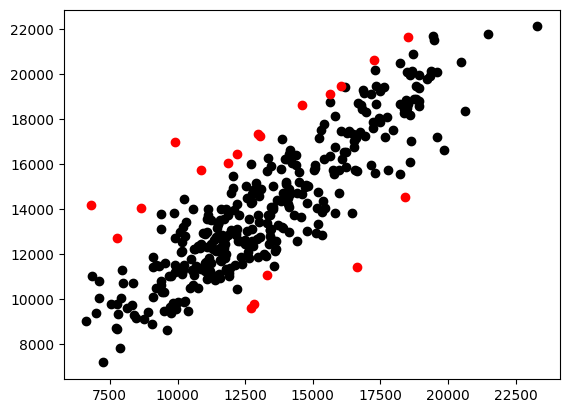

In [6]:
print('number of points outside 95 percentile: ',sum(abs(error)>x975))
outside = abs(error)>x975
plt.plot(w.Estat[~outside],w.Edyn[~outside],'ko')
plt.plot(w.Estat[outside],w.Edyn[outside],'ro')

###Exercise 3. Fit `Estat` vs `Edyn` or the other way around?
In the previous two exercises, we assumed that `Estat` is more accurate than `Edyn` so we fit: `Edyn = a1 * Estat + b1`; let's call this line 1. Next, we assume `Edyn` is more accurate than `Estat` so we fit `Estat = a2 * Edyn + b2`; let's call this line 2. Plot the `Edyn` data on the $y$-axis vs. the `Estat` data on the $x$-axis using blue markers. Plot the two best-fit lines you computed using red (line 1) and green (line 2), label the axes and add a legend. Report the slope and intercept of the best fit lines as they are shown on the graph (Note: that requires a bit of algebra for line 2 as it needs to be reworked in the form `Edyn = slope * Estat + intercept`).

a1,b1:  0.8366743481434626 3010.5502686914456
a2,b2:  1.1107851898491314 -625.8441960382246


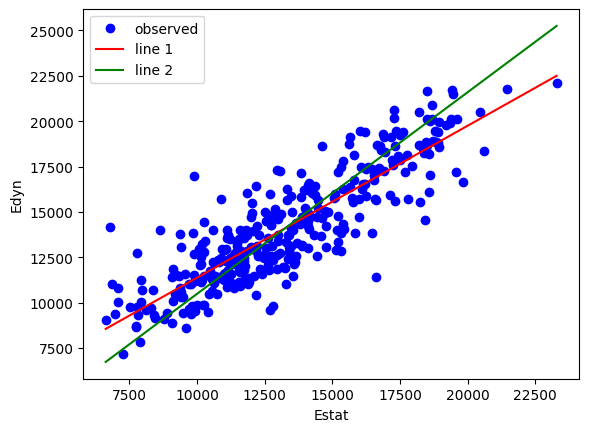

In [7]:
a1,b1 = np.polyfit(w.Estat,w.Edyn,1)
a2,b2 = np.polyfit(w.Edyn,w.Estat,1)
print('a1,b1: ',a1,b1)
print('a2,b2: ',1.0/a2,-b2/a2)
plt.plot(w.Estat,w.Edyn,'bo',label='observed')
x1 = np.array([w.Estat.min(),w.Estat.max()])
y1 = a1*x1 + b1
plt.plot(x1,y1,'r',label='line 1')
y2 = 1.0/a2 * x1 - b2/a2
plt.plot(x1,y2,'g',label='line 2')
plt.xlabel('Estat')
plt.ylabel('Edyn')
plt.legend(loc='best')

###Exercise 4. Error analysis of `Estat` vs `Edyn` and the other way around.
In the previous exercise, two straight lines were fit of the form `Edyn = slope * Estat + intercept`. Compute and report the mean error and the square root of the mean squared error of both straight lines, where the error is defined as the measured `Edyn` minus the fitted `Edyn`. Plot the errors vs. `Estat` for the two fitted lines with red and green dots, respectively. Does either of the errors show a trend?

mean error line 1:  9.565022931005179e-12
mean error line 2:  6.05989166462187e-12
mean squared error line 1:  1536.3611500008926
mean squared error line 2:  1770.2317669483707


Text(0.5, 1.0, 'Line 2 (green dots) shows a trend')

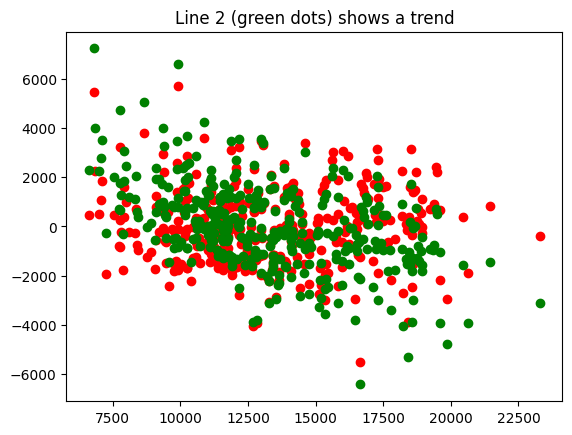

In [8]:
error1 = w.Edyn - a1 * w.Estat - b1
error2 = w.Edyn - 1/a2 * w.Estat + b2/a2
print('mean error line 1: ',np.mean(error1))
print('mean error line 2: ',np.mean(error2))
print('mean squared error line 1: ',np.sqrt(np.mean(error1**2)))
print('mean squared error line 2: ',np.sqrt(np.mean(error2**2)))
#
plt.plot(w.Estat,error1,'ro')
plt.plot(w.Estat,error2,'go')
plt.title('Line 2 (green dots) shows a trend')

### Curve fitting
To be added